<a href="https://colab.research.google.com/github/Marchbreeze/Edu-Public-Data/blob/main/prediction_result.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# 고등학교 5개년 데이터 통합
import pandas as pd

file_paths = [
    'paps_highschool_2024.csv',
    'paps_highschool_2023.csv',
    'paps_highschool_2022.csv',
    'paps_highschool_2021.csv',
    'paps_highschool_2020.csv'
]

dataframes = [pd.read_csv(file_path) for file_path in file_paths]
df = pd.concat(dataframes, ignore_index=True)
df

,시도교육청,교육지원청,지역,정보공시 학교코드,학교명,학교급코드,설립구분,제외여부,제외사유,학년,...,%,인원.1,%.1,인원.2,%.2,인원.3,%.3,인원.4,%.4,검사인원수
0,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,9.1,9.0,40.9,10.0,45.5,1.0,4.5,0.0,0.0,22.0
1,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,1학년,...,3.2,66.0,52.8,46.0,36.8,9.0,7.2,0.0,0.0,125.0
2,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,0.0,8.0,33.3,13.0,54.2,3.0,12.5,0.0,0.0,24.0
3,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,2학년,...,1.7,42.0,35.6,60.0,50.8,14.0,11.9,0.0,0.0,118.0
4,서울특별시교육청,서울특별시교육청,서울특별시 강남구,S000003540,국립국악고등학교,4,국립,N,NaN,3학년,...,0.0,7.0,22.6,11.0,35.5,8.0,25.8,5.0,16.1,31.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41559,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,1학년,...,6.7,23.0,38.3,32.0,53.3,1.0,1.7,0.0,0.0,60.0
41560,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,2.4,13.0,31.0,23.0,54.8,4.0,9.5,1.0,2.4,42.0
41561,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,2학년,...,2.0,18.0,36.7,25.0,51.0,5.0,10.2,0.0,0.0,49.0
41562,제주특별자치도교육청,제주특별자치도교육청,제주특별자치도 제주시,S170000773,제주외국어고등학교,4,공립,N,NaN,3학년,...,0.0,9.0,28.1,17.0,53.1,5.0,15.6,1.0,3.1,32.0


In [88]:
# 사용자 입력 받기
school_name = input('학교명을 입력하세요: ')
gender = input('성별을 입력하세요(남자/여자): ')

학교명을 입력하세요: 청량고등학교
성별을 입력하세요(남자/여자): 남자


In [89]:
# 해당 학교, 성별의 왕복오래달리기 각 학년별 연평균 구하기

import pandas as pd
import numpy as np

# 0과 NaN이 아닌 값들만 필터링해 평균을 계산하는 함수
def mean_without_zeros_or_nan(x):
    filtered_x = x[(x != 0) & (~np.isnan(x))]
    if len(filtered_x) > 0:
        return filtered_x.mean()
    else:
        return np.NaN

# 해당 학교, 성별 데이터 필터링
filtered_df = df[(df['학교명'] == school_name) & (df['성별'] == gender)]

# 각 학년별 왕복오래달리기의 평균값 및 각 값들 계산
result_df = filtered_df.groupby('학년').agg(
    평균값=pd.NamedAgg(column='왕복오래달리기(회)', aggfunc=mean_without_zeros_or_nan),
    연도별=pd.NamedAgg(column='왕복오래달리기(회)', aggfunc=lambda x: list(x[(x != 0) & (~np.isnan(x))]))
).reset_index()

result_df

,학년,평균값,연도별
0,1학년,70.55,"[80.0, 73.3, 75.0, 53.9]"
1,2학년,71.80,"[86.0, 57.3, 74.4, 69.5]"
2,3학년,81.75,"[89.0, 82.6, 83.6, 71.8]"


In [90]:
# 왕복오래달리기 학년별 등급별 평균 설정
data_even = [
    [75, 62.5, 48.5, 33.5, 20],  # 고1
    [77, 64.5, 50.5, 35.5, 22],  # 고2
    [79, 66.5, 52.5, 37.5, 24]   # 고3
]

In [91]:
import json

# 회귀직선 정보(기울기와 절편)를 저장하는 함수
def save_regression_line(model, grade):
    # 회귀직선 정보 추출
    line_info = {'slope': model.coef_[0], 'intercept': model.intercept_}

    # 파일 이름 정의
    line_filename = f'line_grade_{grade}.json'

    # JSON 형식으로 저장
    with open(line_filename, 'w') as file:
        json.dump(line_info, file)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature n

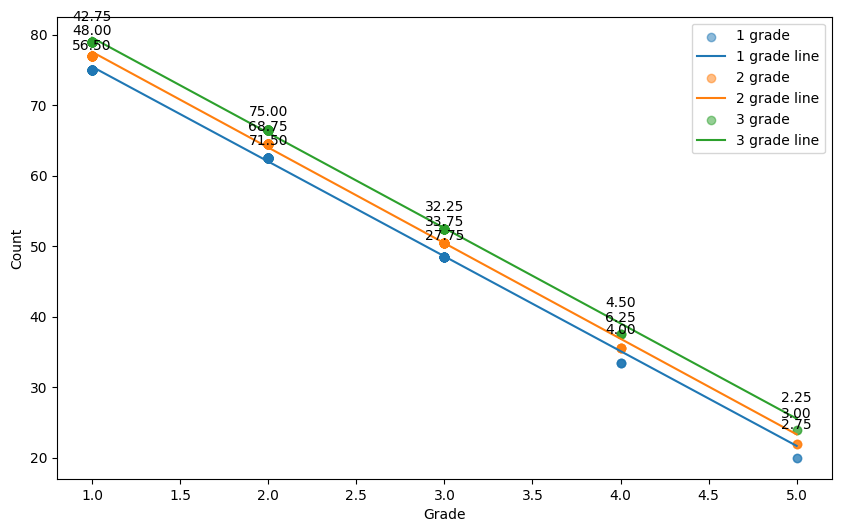

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 회귀 모델 생성 및 훈련, 그래프 그리기를 위한 함수
def create_regression_and_plot(df, grade, ax):
    # 해당 학년 데이터 필터링
    df_grade = df[df['학년'] == f'{grade}학년']

    # 등급별 인원수 합계, 평균 계산
    grade_students_sum = df_grade[['인원.1', '인원.2', '인원.3', '인원.4']].sum().tolist()
    grade_students_sum.append(df_grade['검사인원수'].sum() - sum(grade_students_sum))
    grade_students_avg = [x / len(df_grade) for x in grade_students_sum]

    # 확장된 데이터 생성
    extended_data = []
    for i, students in enumerate(grade_students_avg):
        extended_data.extend([data_even[grade-1][i]] * int(students))

    # 데이터프레임 생성
    df_extended = pd.DataFrame({
        '등급': np.repeat(range(1, 6), grade_students_avg),
        '왕복오래달리기 개수': extended_data
    })

    # 회귀 모델 생성 및 훈련
    model = LinearRegression()
    X = df_extended[['등급']]
    y = df_extended['왕복오래달리기 개수']
    model.fit(X, y)

    # 회귀곡선 그리기
    ax.scatter(X, y, alpha=0.5, label=f'{grade} grade')
    ax.plot(X, model.predict(X), label=f'{grade} grade line')

    # 회귀 모델 저장
    save_regression_line(model, grade)

    # 각 등급별 평균 인원수 표시
    for i, point in enumerate(X['등급'].unique()):
        avg_students = grade_students_avg[i]
        ax.annotate(f'{avg_students:.2f}',
                    xy=(point, model.predict([[point]])[0]),
                    xytext=(0, 10),
                    textcoords='offset points',
                    ha='center',
                    va='bottom')

# 각 학년별로 회귀곡선 생성 및 그래프 그리기
fig, ax = plt.subplots(figsize=(10, 6))
for grade in range(1, 4):
    create_regression_and_plot(filtered_df, grade, ax)

# 그래프 설정
plt.xlabel('Grade')
plt.ylabel('Count')
plt.legend()
plt.show()

In [82]:
# 사용자 점수 받기
my_score = int(input('왕복오래달리기 점수를 입력하세요: '))

왕복오래달리기 점수를 입력하세요: 60


In [99]:
def find_grade_from_count(count, grade):
    # JSON 파일에서 회귀직선 정보 로드
    line_filename = f'line_grade_{grade}.json'
    with open(line_filename, 'r') as file:
        line_info = json.load(file)

    # 회귀직선 정보 추출
    slope = line_info['slope']
    intercept = line_info['intercept']

    # 등급 계산 후 반올림
    grade_calculated = (count - intercept) / slope
    grade_rounded = round(grade_calculated, 2)
    return grade_rounded

grade1 = find_grade_from_count(my_score, 1)
grade2 = find_grade_from_count(my_score, 2)
grade3 = find_grade_from_count(my_score, 3)

print(f'1학년에서 갯수가 {my_score}개일 때 예상 등급: {grade1}')
print(f'2학년에서 갯수가 {my_score}개일 때 예상 등급: {grade2}')
print(f'3학년에서 갯수가 {my_score}개일 때 예상 등급: {grade3}')

1학년에서 갯수가 60개일 때 예상 등급: 2.15
2학년에서 갯수가 60개일 때 예상 등급: 2.29
3학년에서 갯수가 60개일 때 예상 등급: 2.45


In [100]:
from scipy.stats import norm

# 데이터 추출
df_1st_year = filtered_df[filtered_df['학년'] == '1학년']
df_2nd_year = filtered_df[filtered_df['학년'] == '2학년']
df_3rd_year = filtered_df[filtered_df['학년'] == '3학년']

# 각 학년별 등급별 0을 제외한 데이터들의 평균 구하는 함수
def average_people_by_grade(df):
    return {
        '1': df[df['인원.1'] != 0]['인원.1'].mean(),
        '2': df[df['인원.2'] != 0]['인원.2'].mean(),
        '3': df[df['인원.3'] != 0]['인원.3'].mean(),
        '4': df[df['인원.4'] != 0]['인원.4'].mean(),
        'total_examinees': df['검사인원수'].mean(),
        '5': df['검사인원수'].mean() - (df[df['인원.1'] != 0]['인원.1'].mean() + df[df['인원.2'] != 0]['인원.2'].mean() +
                                     df[df['인원.3'] != 0]['인원.3'].mean() + df[df['인원.4'] != 0]['인원.4'].mean())
    }

# 상위 % 계산 함수에 학년별 등급별 평균 데이터 적용
def calculate_percentile_for_year(grade, average_people_by_grade):
    total_percentage = 0
    for g, (mean, std) in mean_std_dev.items():
        total_percentage += norm(mean, std).cdf(grade) * average_people_by_grade[g]
    return 100 * total_percentage / average_people_by_grade['total_examinees']

# 각 학년별 등급별 평균 구하기
average_people_by_grade_1st = average_people_by_grade(df_1st_year)
average_people_by_grade_2nd = average_people_by_grade(df_2nd_year)
average_people_by_grade_3rd = average_people_by_grade(df_3rd_year)

# 각 학년의 등급에 대한 상위 백분율 계산
percentile_1st = calculate_percentile_for_year(grade1, average_people_by_grade_1st)
percentile_2nd = calculate_percentile_for_year(grade2, average_people_by_grade_2nd)
percentile_3rd = calculate_percentile_for_year(grade3, average_people_by_grade_3rd)

print(f"1학년 {grade1}등급은 상위 {percentile_1st:.2f}%에 해당합니다.")
print(f"2학년 {grade2}등급은 상위 {percentile_2nd:.2f}%에 해당합니다.")
print(f"3학년 {grade3}등급은 상위 {percentile_3rd:.2f}%에 해당합니다.")



1학년 2.15등급은 상위 38.16%에 해당합니다.
2학년 2.29등급은 상위 38.65%에 해당합니다.
3학년 2.45등급은 상위 47.40%에 해당합니다.
